<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/miniproject1/microprojectRaizaB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
df3 = pd.read_csv('/content/drive/My Drive/netflix_titles.csv')
df3.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


Dimensiones de los datos (número de observaciones, número de variables)


In [0]:
df3.shape

(6234, 12)

In [0]:
df3.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Tipos de variables (numéricas, texto, etc)

In [0]:
df3.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [0]:
df3_num = df3.select_dtypes(include='number')
df3_num.head()

,show_id,release_year
0,81145628,2019
1,80117401,2016
2,70234439,2013
3,80058654,2016
4,80125979,2017


In [0]:
df3_txt = df3.select_dtypes(include='object')
df3_txt.head()

,type,title,director,cast,country,date_added,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


Ahora procedo a buscar dentro la variable Director, aquellas peliculas o series que no la tengan.

In [0]:
df3_txt.loc[df3_txt['director'].isna()==True]

,type,title,director,cast,country,date_added,rating,duration,listed_in,description
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
...,...,...,...,...,...,...,...,...,...,...
6229,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [0]:
df3.loc[df3['director'].isna()==True].shape[0]

1969

en efecto hay 1969 filas que no contienen un Director, procedemos a hacer un drop ya que las opciones de imputar con valores semejantes no me es posible con datos object.

In [0]:
df3_drops = df3['director'].dropna()
df3_drops.shape

(4265,)

Nos han quedado ahora 4265 filas con un Director asignado.

Resumen estadístico básico de las variables numéricas con comentarios sobre valores medios, dispersion, rango y presencia de datos incompletos.

In [0]:
df3.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


En base al resumen, podemos ver que hay 6234 peliculas y series en la base de datos. Una media de 2013. Hay data de pelis y series de 1925 o anterior, un 25% del 2013 o anteriores, siendo el 75% de la plataforma contenido del 2018 o años anteriores. Solo hay contenido hasta el año actual 2020. (obviamente)

Obtención de parámetros indicativos mediante filtrado de valores en alguna de las variables

Is Netflix has increasingly focusing on TV rather than movies in recent years?

---



In [0]:
df3.loc[(df3['type']=='Movie')].shape [0]

4265

Hay 4265 peliculas en la plataforma

In [0]:
df3.loc[(df3['duration']<'60 min')].shape [0]

4220

y 4220 series, sin embargo, no pude filtrarlo correctament por tantas cantidades de temporadas ni por tipo de contenido (tv show) para un resultado más exacto por lo que es dudoso.

Understanding what content is available in different countries

In [0]:
Nthrillers= df3.loc[(df3['listed_in']=='Thrillers')].shape[0]
print ('Hay {} peliculas del genero thriller en la BBDD'.format(Nthrillers))


Hay 40 peliculas del genero thriller en la BBDD
ERROR! Session/line number was not unique in database. History logging moved to new session 92


In [0]:
df3.loc[(df3['listed_in']=='Thrillers')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
267,81183572,Movie,Deviant Love,Michael Feifer,"Emma Bell, Nick Ballard, Bradley Bundlie, Gail...",United States,"September 13, 2019",2019,TV-14,87 min,Thrillers,"In a tailspin after her marriage collapses, Ja..."
298,80991570,Movie,"My Teacher, My Obsession",Damián Romay,"Lucy Loken, Laura Bilgeri, Rusty Joiner, Alexa...",United States,"September 10, 2018",2018,TV-14,86 min,Thrillers,"When Riley changed schools, she didn't expect ..."
393,80183897,Movie,The Drowning,Bette Gordon,"Josh Charles, Julia Stiles, Avan Jogia, Tracie...","United States, Hong Kong","September 1, 2017",2016,TV-MA,99 min,Thrillers,Child psychologist Tom Seymour's testimony hel...
704,80142617,Movie,Money,Martin Rosete,"Kellan Lutz, Jess Weixler, Jesse Williams, Jam...","United States, Spain","October 15, 2017",2016,R,84 min,Thrillers,Two corporate spies with a $5 million haul for...
759,80223997,Movie,Fractured,Brad Anderson,"Sam Worthington, Lily Rabe, Stephen Tobolowsky...",United States,"October 11, 2019",2019,TV-MA,100 min,Thrillers,After his wife and injured daughter disappear ...
779,60002273,Movie,Along Came a Spider,Lee Tamahori,"Morgan Freeman, Monica Potter, Michael Wincott...","United States, Germany, Canada","October 1, 2019",2001,R,103 min,Thrillers,When a girl is kidnapped from a prestigious pr...
1118,81218079,Movie,Awake,"Aleksandr Chernyaev, Fedor Lyass","Jonathan Rhys Meyers, Francesca Eastwood, Mali...",United States,"November 24, 2019",2019,TV-MA,92 min,Thrillers,After an accident leaves him with no recollect...
1366,1192866,Movie,Fallen,Gregory Hoblit,"Denzel Washington, John Goodman, Donald Suther...",United States,"November 1, 2019",1998,R,124 min,Thrillers,A tough homicide cop faces his most dangerous ...
1416,1178866,Movie,The Game,David Fincher,"Michael Douglas, Sean Penn, Deborah Kara Unger...",United States,"November 1, 2019",1997,R,129 min,Thrillers,Nicholas receives an unusual birthday present ...
1564,80217133,Movie,Kaleidoscope,Rupert Jones,"Toby Jones, Anne Reid, Sinead Matthews, Cecili...",United Kingdom,"May 8, 2018",2016,TV-MA,99 min,Thrillers,A quiet ex-con's tenuous grip on reality start...


La mayoría del contenido Thriller lo produce USA

In [0]:
N2018 = df3.loc[df3['release_year']==2018].shape[0]

print('Hay un total de {} peliculas del 2018'.format(N2018))

Hay un total de 1063 peliculas del 2018


In [0]:
N1925 = df3.loc[df3['release_year']==1925].shape[0]

print('Hay un total de {} peliculas de 1925'.format(N1925))

Hay un total de 1 peliculas de 1925


In [0]:
Nkubrick = df3.loc[df3['director']=='Stanley kubrick'].shape[0]

print('Hay un total de {} peliculas de Kubrick'.format(Nkubrick))

Hay un total de 0 peliculas de Kubrick


In [0]:
Nfincher = df3.loc[df3['director']=='David Fincher'].shape[0]

print('Hay un total de {} peliculas de David Fincher'.format(Nfincher))

Hay un total de 3 peliculas de David Fincher


In [0]:
df3.sort_values(by=['country'],ascending=True)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
532,81105406,TV Show,Monzón: A Knockout Blow,NaN,"Jorge Román, Mauricio Paniagua, Carla Quevedo,...",Argentina,"October 25, 2019",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",This dramatization tells the story of Argentin...
6210,80239700,TV Show,Psiconautas,NaN,"Guillermo Toledo, Gabriel Goity, Florencia Peñ...",Argentina,"April 15, 2018",2016,TV-MA,2 Seasons,"International TV Shows, Spanish-Language TV Sh...",A Spanish con man masquerades as a therapist a...
4075,80156767,Movie,La Última Fiesta,"Leandro Mark, Nicolás Silbert","Nicolás Vázquez, Alan Sabbagh, Benjamín Amadeo...",Argentina,"February 1, 2017",2016,TV-MA,104 min,"Comedies, International Movies",Three best buddies are thrown into a wild chas...
398,80190990,Movie,Todo Sobre El Asado,"Mariano Cohn, Gastón Duprat",El Negro Álvarez,Argentina,"September 1, 2017",2016,TV-14,86 min,"Documentaries, International Movies",This quirky examination of Argentina's culture...
4422,80142140,Movie,Daemonium,Pablo Parés,"Walter Cornás, Dany Casco, Caro Angus, Rocío R...",Argentina,"December 20, 2016",2015,NR,115 min,"Action & Adventure, Horror Movies, Internation...",In a realm where magic and technology intersec...
...,...,...,...,...,...,...,...,...,...,...,...,...
6170,80136456,TV Show,Age of Glory,NaN,"Debbie Goh, Aenie Wong, Frederick Lee, Leslie ...",NaN,"August 14, 2017",2010,TV-PG,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Amid the thriving nightlife of 1960s Kuala Lum...
6195,80136790,TV Show,Goodnight DJ 1,NaN,"Chan Fong, Z-Chen, Frederick Lee, Melvin Sia, ...",NaN,"April 27, 2018",2016,TV-14,2 Seasons,"International TV Shows, TV Dramas, TV Horror",Young radio announcers from varying background...
6199,80244228,TV Show,Beauty and the Bitches,NaN,"Methinee Kingpayome, Son Songpaisarn, Yingying...",NaN,"April 23, 2019",2016,TV-14,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Beauty pageant contestants from all over Thail...
6228,80159925,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...


En Argentina hay una oferta variada de series y pelis, producen muchos shows en vivo y contenido Drama

Representación gráfica de los datos mediante diagramas de barras e histogramas de las variables

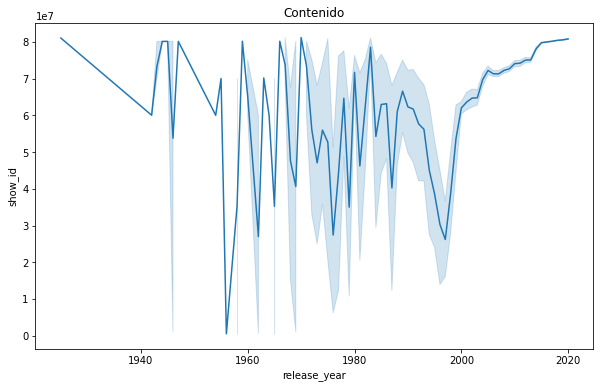

<Figure size 432x288 with 0 Axes>

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x="release_year", y="show_id", data=df3)
ax.set_title('Contenido')
plt.show()
plt.savefig('content.png')

In [0]:
df3['country'] = df3.country.replace(['United states','canada','argentina'],[1,2,3])
df3.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


Análisis de las correlaciones existentes entre variables numéricas e interpretación: no hay muchas variables numericas en este caso.